In [88]:
import pandas as pd

In [89]:
#1a
data = pd.read_csv("GlobalLandTemperaturesByState.csv")

In [90]:
data = data[['dt', 'AverageTemperature', 'State']]

In [91]:
data['dt'] = pd.to_datetime(data['dt'])
data = data[data['dt'].dt.year > 2000]

In [92]:
data = data[data['State'].isin(['Wyoming', 'Nebraska', 'South Dakota'])]

In [93]:
data

,dt,AverageTemperature,State
350773,2001-01-01,-2.592,Nebraska
350774,2001-02-01,-5.575,Nebraska
350775,2001-03-01,2.077,Nebraska
350776,2001-04-01,10.431,Nebraska
350777,2001-05-01,15.878,Nebraska
...,...,...,...
626435,2013-05-01,10.607,Wyoming
626436,2013-06-01,16.267,Wyoming
626437,2013-07-01,20.222,Wyoming
626438,2013-08-01,19.621,Wyoming


In [94]:
#1b 
average_temp = data.groupby('dt')['AverageTemperature'].mean().reset_index()


In [95]:
average_temp.columns = ['Date', 'AverageTemperature']


In [96]:
print(average_temp)

          Date  AverageTemperature
0   2001-01-01           -4.480333
1   2001-02-01           -7.541000
2   2001-03-01            0.590333
3   2001-04-01            7.889000
4   2001-05-01           13.908667
..         ...                 ...
148 2013-05-01           13.196000
149 2013-06-01           18.783667
150 2013-07-01           22.110333
151 2013-08-01           21.890000
152 2013-09-01           18.953000

[153 rows x 2 columns]


In [97]:
#1c 
import matplotlib.pyplot as plt


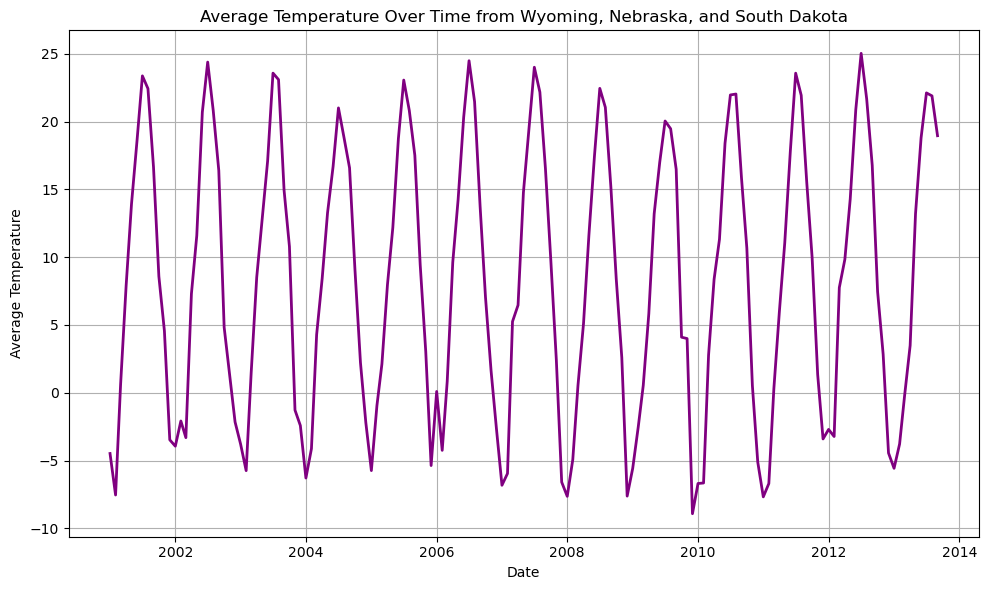

In [98]:
plt.figure(figsize=(10, 6))
plt.plot(average_temp['Date'], average_temp['AverageTemperature'], color='purple', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Average Temperature Over Time from Wyoming, Nebraska, and South Dakota')
plt.grid(True)
plt.tight_layout()
plt.show()

In [99]:
#1d 

average_temp['NumericDate'] = average_temp['Date'].apply(lambda x: pd.Timestamp(x).toordinal())



In [100]:
print(average_temp)

          Date  AverageTemperature  NumericDate
0   2001-01-01           -4.480333       730486
1   2001-02-01           -7.541000       730517
2   2001-03-01            0.590333       730545
3   2001-04-01            7.889000       730576
4   2001-05-01           13.908667       730606
..         ...                 ...          ...
148 2013-05-01           13.196000       734989
149 2013-06-01           18.783667       735020
150 2013-07-01           22.110333       735050
151 2013-08-01           21.890000       735081
152 2013-09-01           18.953000       735112

[153 rows x 3 columns]


In [101]:
average_temp.to_csv('edited_average_temp.csv', index=False)

In [102]:
#1e
import numpy as np
from scipy.optimize import curve_fit

import pandas as pd


data = pd.read_csv('edited_average_temp.csv')


def cosine_model(x, A, omega, phi, B):
    return A * np.cos(omega * x + phi) + B


x_data = data['NumericDate']
y_data = data['AverageTemperature']


A_guess = (max(y_data) - min(y_data)) / 2  # Amplitude
omega_guess = 2 * np.pi / 365  # Angular frequency (corresponds to one year)
phi_guess = 0  # Phase shift
B_guess = np.mean(y_data)  # Offset (mean temperature)

initial_guess = [A_guess, omega_guess, phi_guess, B_guess]



In [103]:
#1f
parameters, covariance = curve_fit(cosine_model, x_data, y_data, p0=initial_guess)

# Print parameters
print("Fitted Parameters:")
print("Amplitude (A):", parameters[0])
print("Angular Frequency (omega):", parameters[1])
print("Phase Shift (phi):", parameters[2])
print("Offset (B):", parameters[3])

Fitted Parameters:
Amplitude (A): 13.89834665330552
Angular Frequency (omega): 0.017201599955523644
Phase Shift (phi): 10.220955921958856
Offset (B): 8.174923597083518


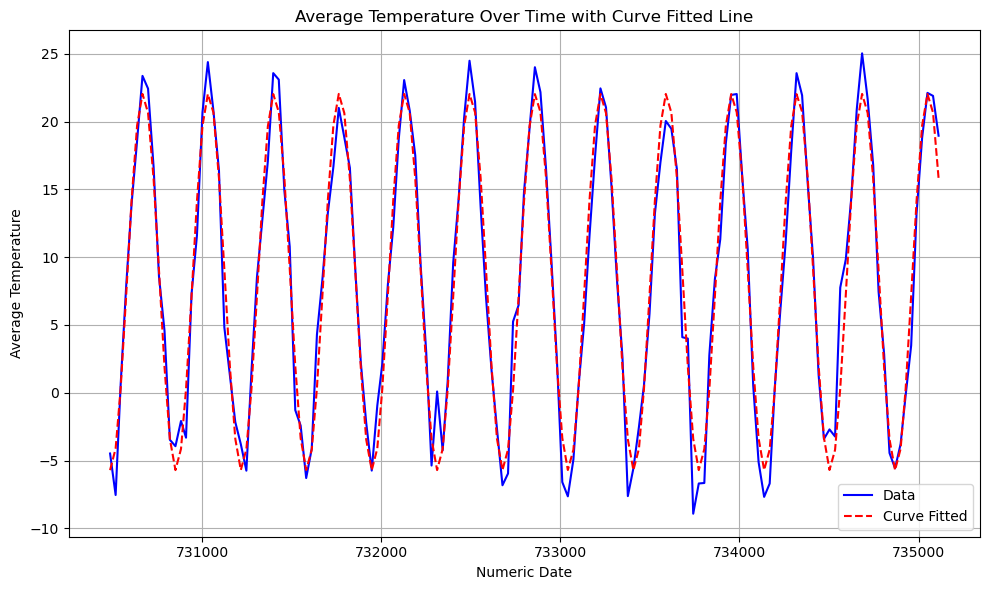

In [104]:
#1g 

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, color='blue', label='Data')


plt.plot(x_data, model_equation(x_data, *parameters), color='red', linestyle='--', label='Curve Fitted')

plt.xlabel('Numeric Date')
plt.ylabel('Average Temperature')
plt.title('Average Temperature Over Time with Curve Fitted Line')
plt.legend()


plt.grid(True)
plt.tight_layout()
plt.show()

In [105]:
# 1h and 1i 
parameter_errors = np.sqrt(np.diag(covariance))


for i, parameter in enumerate(parameters):
    print(f"Parameter {i + 1}: {parameter:.2f} +/- {parameter_errors[i]:.2f}")


A, omega, phi, B = parameters
print(f"Final Equation: {A:.2f} * cos({omega:.2f} * x + {phi:.2f}) + {B:.2f}")


Parameter 1: 13.90 +/- 0.23
Parameter 2: 0.02 +/- 0.00
Parameter 3: 10.22 +/- 9.01
Parameter 4: 8.17 +/- 0.16
Final Equation: 13.90 * cos(0.02 * x + 10.22) + 8.17
